In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/All_Diets.csv')

In [ ]:
df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09


#Exploratory Data Analysis

In [ ]:
df['Diet_type'].unique()

array(['paleo', 'vegan', 'keto', 'mediterranean', 'dash'], dtype=object)

In [ ]:
df['Cuisine_type'].unique()

array(['american', 'south east asian', 'mexican', 'chinese',
       'mediterranean', 'italian', 'french', 'indian', 'nordic',
       'eastern europe', 'central europe', 'kosher', 'british',
       'caribbean', 'south american', 'middle eastern', 'asian',
       'japanese', 'world'], dtype=object)

In [ ]:
df['Recipe_name'].duplicated().value_counts()

,count
Recipe_name,
False,7062
True,744


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


#Handling missing values

In [ ]:
df.isnull().sum()

,0
Diet_type,0
Recipe_name,0
Cuisine_type,0
Protein(g),0
Carbs(g),0
Fat(g),0
Extraction_day,0
Extraction_time,0


###No missing values

In [ ]:
df.duplicated().value_counts()

,count
False,7801
True,5


#Handling Duplicates

In [ ]:
df[df.duplicated(keep=False) == True]
# Dropout duplicated and double check
df = df.drop_duplicates()
df.duplicated().value_counts()

,count
False,7801


In [ ]:
#duplicatesd Recipe_name
duplicate_recipes = df[df['Recipe_name'].duplicated(keep=False)]

# Group by Recipe_name and check if Protein, Carbs, and Fat content are identical
same_nutrition_duplicates = duplicate_recipes.groupby('Recipe_name').filter(
    lambda group: group['Protein(g)'].nunique() == 1 and
                  group['Carbs(g)'].nunique() == 1 and
                  group['Fat(g)'].nunique() == 1
)

#duplicates with identical nutritional values
print(f"Number of duplicate recipe names with identical nutrition values: {same_nutrition_duplicates['Recipe_name'].nunique()}")

#keeping the first occurrence
df= df.drop_duplicates(subset=['Recipe_name', 'Protein(g)', 'Carbs(g)', 'Fat(g)'], keep='first')


print(f"Number of rows after removing duplicates with identical nutrition values: {df.shape[0]}")


Number of duplicate recipe names with identical nutrition values: 158
Number of rows after removing duplicates with identical nutrition values: 7610


#Data Visualization

Text(0, 0.5, '')

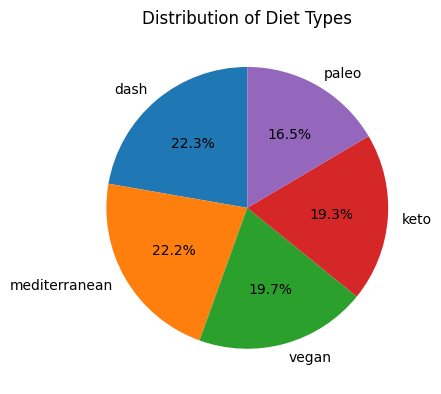

In [ ]:
import matplotlib.pyplot as plt
# Diet_type
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['Diet_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Distribution of Diet Types')
plt.ylabel('')



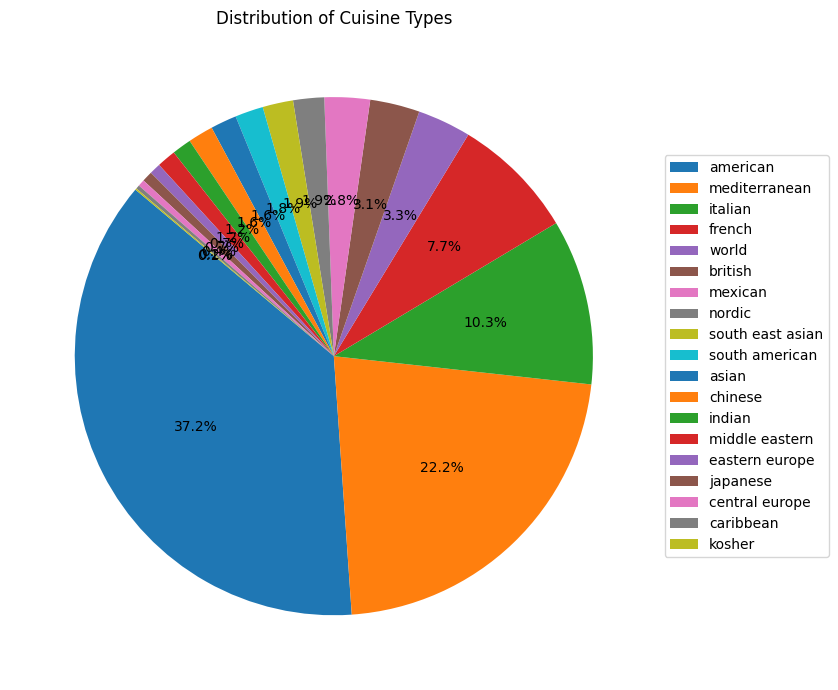

In [ ]:
import matplotlib.pyplot as plt

# Sample data for demonstration
labels = df['Cuisine_type'].value_counts().index  # Assuming you have 'Cuisine_Type' in your DataFrame
sizes = df['Cuisine_type'].value_counts().values

# Plot pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=140)

# Add a legend outside the pie chart
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

# Add title
plt.title('Distribution of Cuisine Types')

# Show plot
plt.tight_layout()
plt.show()

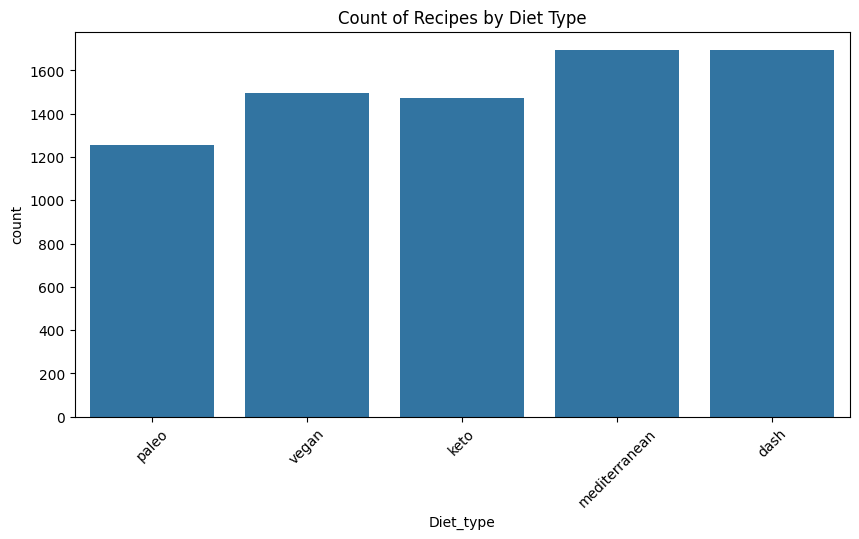

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Diet_type')
plt.title('Count of Recipes by Diet Type')
plt.xticks(rotation=45)
plt.show()

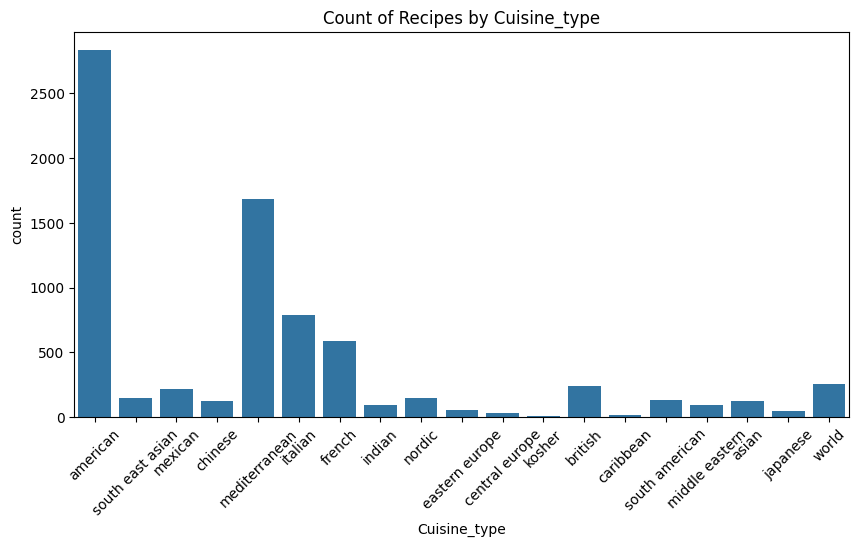

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Cuisine_type')
plt.title('Count of Recipes by Cuisine_type')
plt.xticks(rotation=45)
plt.show()

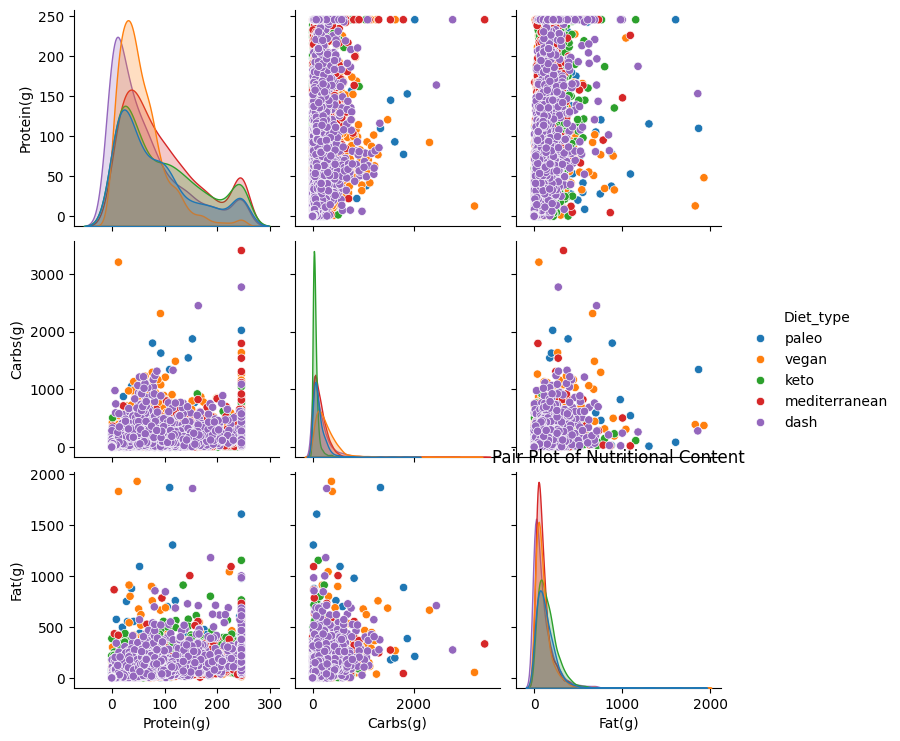

In [ ]:
sns.pairplot(df, hue='Diet_type')
plt.title('Pair Plot of Nutritional Content')
plt.show()


In [ ]:
# Drop Extraction_day and Extraction_time columns from the dataset
df = df.drop(['Extraction_day', 'Extraction_time'], axis=1)

In [ ]:
df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Protein(g)', 'Carbs(g)', 'Fat(g)']] = scaler.fit_transform(df[['Protein(g)', 'Carbs(g)', 'Fat(g)']])

In [ ]:
df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,Bone Broth From 'Nom Nom Paleo',american,0.004099,0.000361,0.001658
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,0.142548,0.008386,0.075711
2,paleo,Paleo Pumpkin Pie,american,0.024270,0.088836,0.050128
3,paleo,Strawberry Guacamole recipes,mexican,0.007553,0.022235,0.031027
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,0.031281,0.015863,0.037068


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Recommendation function with ingredient filtering
def recommend_recipes(user_protein, user_carbs, user_fat, ingredient=None, diet_type=None, cuisine_type=None, top_n=5):
    # Normalize user input to match the dataset scale
    user_input = np.array([[user_protein, user_carbs, user_fat]])
    user_input_normalized = scaler.transform(user_input)

    # Filter by diet type, cuisine type, and ingredient if specified
    filtered_df = df.copy()
    if diet_type:
        filtered_df = filtered_df[filtered_df['Diet_type'] == diet_type]
    if cuisine_type:
        filtered_df = filtered_df[filtered_df['Cuisine_type'] == cuisine_type]
    if ingredient:
        filtered_df = filtered_df[filtered_df['Recipe_name'].str.contains(ingredient, case=False, na=False)]

    # If no recipes match after filtering, return an empty DataFrame
    if filtered_df.empty:
        return pd.DataFrame(columns=['Recipe_name', 'Diet_type', 'Cuisine_type', 'Similarity'])

    # Calculate cosine similarity between user input and each recipe
    similarity_scores = cosine_similarity(user_input_normalized, filtered_df[['Protein(g)', 'Carbs(g)', 'Fat(g)']])[0]

    # Add similarity scores to the dataframe and sort recipes based on similarity
    filtered_df['Similarity'] = similarity_scores
    recommended_recipes = filtered_df.sort_values(by='Similarity', ascending=False)

    # Return top N recommendations
    return recommended_recipes[['Recipe_name', 'Diet_type', 'Cuisine_type', 'Similarity']].head(top_n)

# Get user input
try:
    user_protein = float(input("Enter your preferred protein level (g): "))
    user_carbs = float(input("Enter your preferred carbs level (g): "))
    user_fat = float(input("Enter your preferred fat level (g): "))

    ingredient = input("Enter an ingredient you'd like (or leave blank): ").strip() or None
    diet_type = input("Enter a diet type (e.g., paleo, vegan) (or leave blank): ").strip() or None
    cuisine_type = input("Enter a cuisine type (e.g., american, mexican) (or leave blank): ").strip() or None

    # Display recommendations
    recommendations = recommend_recipes(user_protein, user_carbs, user_fat, ingredient=ingredient, diet_type=diet_type, cuisine_type=cuisine_type)
    print("\nTop Recipe Recommendations:")
    print(recommendations)

except ValueError:
    print("Please enter valid numbers for protein, carbs, and fat levels.")


Enter your preferred protein level (g): 58
Enter your preferred carbs level (g): 60
Enter your preferred fat level (g): 10
Enter an ingredient you'd like (or leave blank): banana
Enter a diet type (e.g., paleo, vegan) (or leave blank): 
Enter a cuisine type (e.g., american, mexican) (or leave blank): 

Top Recipe Recommendations:
                                            Recipe_name Diet_type  \
7609  Chicken Curry with Bananas, Raisins, and Peanu...      dash   
6424                          Peanut Butter Banana Cake      dash   
948                                   Paleo Banana Loaf     paleo   
845                                  paleo banana bread     paleo   
1021                                 Paleo Banana Bread     paleo   

          Cuisine_type  Similarity  
7609  south east asian    0.828288  
6424          american    0.757060  
948            british    0.755407  
845           american    0.748828  
1021          american    0.732817  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
